## Load in packages and modified FROMAGe

In [1]:
%cd ../..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser
import pickle

In [4]:
parser = PromptParser("src/fromage_inf/fromage_model/")

# Load the relations dictionary to make the relations.
relations = pickle.load(open("src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


## Visual arithmetics

companies -> CEOs
Arithmetic:
CEOs/mark_zuckerberg + (companies/microsoft - CEOs/bill_gates)
Expected result: companies/facebook
Model generated outputs:
 logo on a white background.
Arithmetic:
CEOs/bill_gates + (companies/tesla - CEOs/elon_musk)
Expected result: companies/microsoft
Model generated outputs:


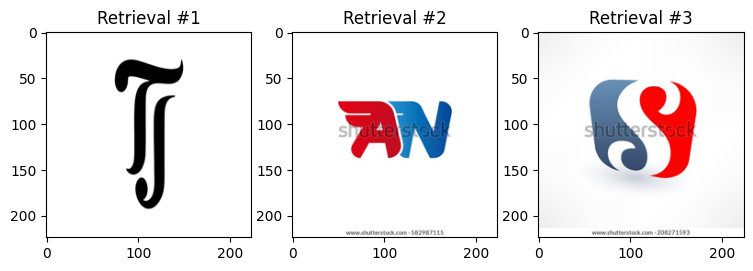

Arithmetic:
CEOs/elon_musk + (companies/amazon - CEOs/jeff_bezos)
Expected result: companies/tesla
Model generated outputs:


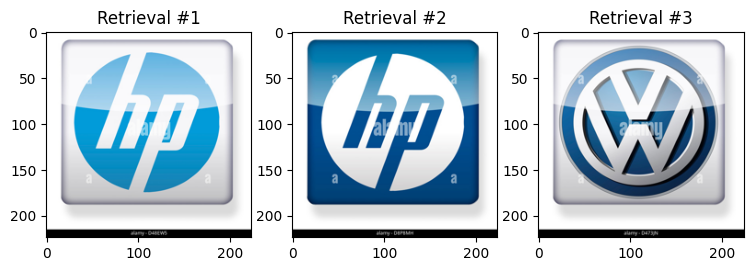

Arithmetic:
CEOs/jeff_bezos + (companies/apple - CEOs/steve_jobs)
Expected result: companies/amazon
Model generated outputs:


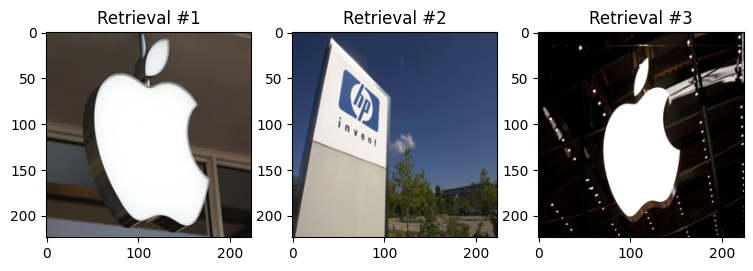

Arithmetic:
CEOs/steve_jobs + (companies/facebook - CEOs/mark_zuckerberg)
Expected result: companies/apple
Model generated outputs:


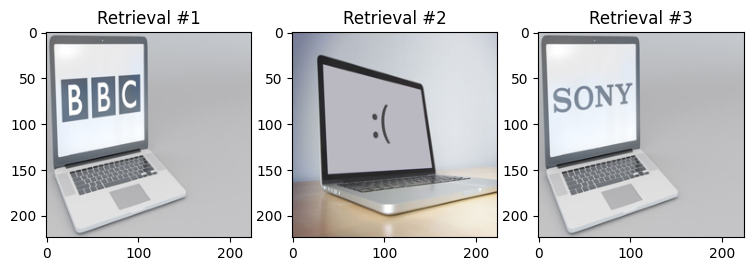

flags -> capital
Arithmetic:
cities/beijing + (flags/egypt - cities/cairo)
Expected result: flags/china
Model generated outputs:
 flag.
Arithmetic:
cities/cairo + (flags/australia - cities/canberra)
Expected result: flags/egypt
Model generated outputs:


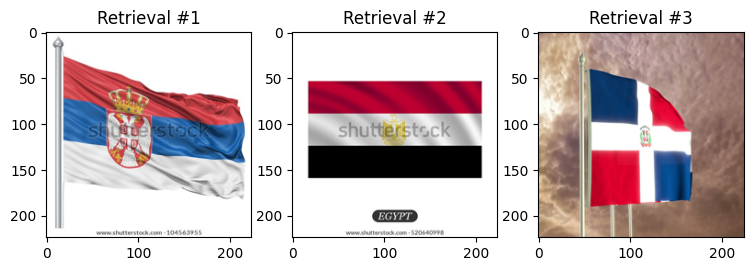

Arithmetic:
cities/canberra + (flags/cuba - cities/havana)
Expected result: flags/australia
Model generated outputs:
 flag with a ribbon and a gold medal.
Arithmetic:
cities/havana + (flags/afghanistan - cities/kabul)
Expected result: flags/cuba
Model generated outputs:


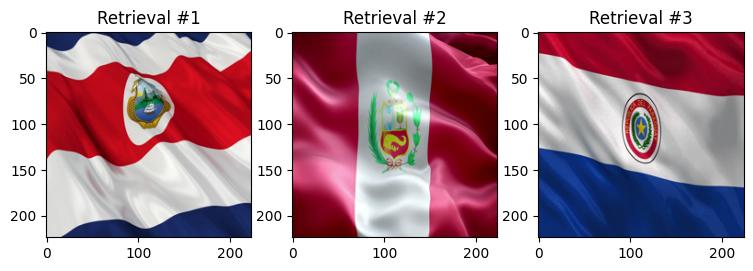

Arithmetic:
cities/kabul + (flags/england - cities/london)
Expected result: flags/afghanistan
Model generated outputs:


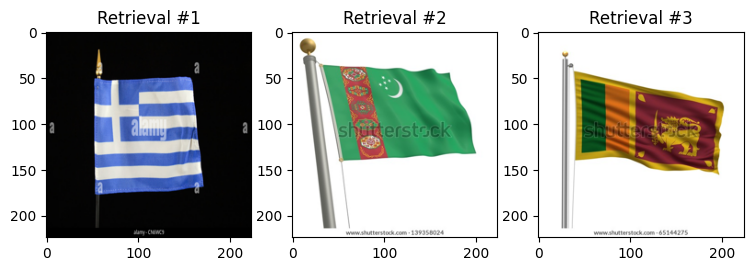

Arithmetic:
cities/london + (flags/japan - cities/tokyo)
Expected result: flags/england
Model generated outputs:


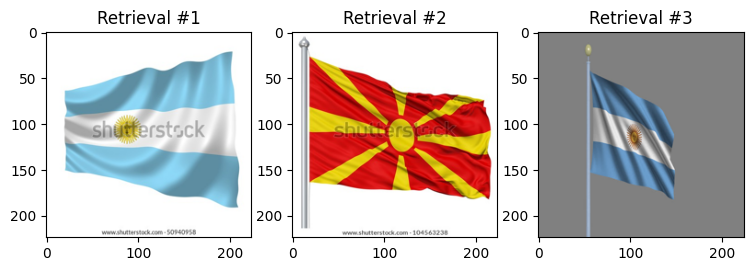

Arithmetic:
cities/tokyo + (flags/russia - cities/moscow)
Expected result: flags/japan
Model generated outputs:


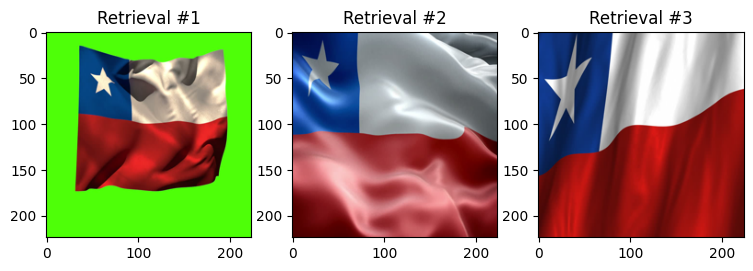

Arithmetic:
cities/moscow + (flags/france - cities/paris)
Expected result: flags/russia
Model generated outputs:
 flag with the national flag colours.
Arithmetic:
cities/paris + (flags/usa - cities/washington)
Expected result: flags/france
Model generated outputs:


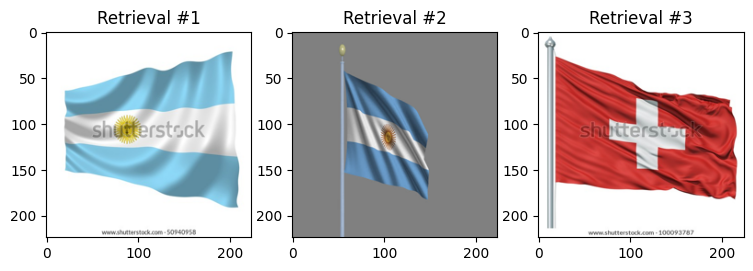

Arithmetic:
cities/washington + (flags/germany - cities/berlin)
Expected result: flags/usa
Model generated outputs:


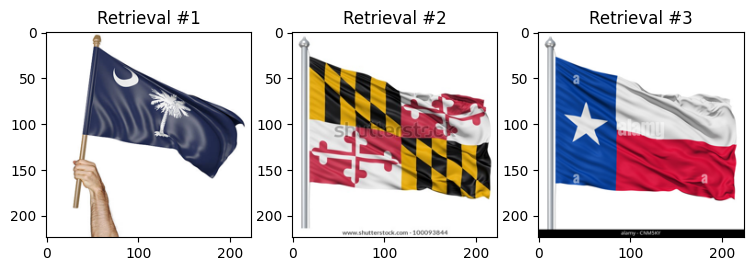

Arithmetic:
cities/berlin + (flags/thailand - cities/bangkok)
Expected result: flags/germany
Model generated outputs:


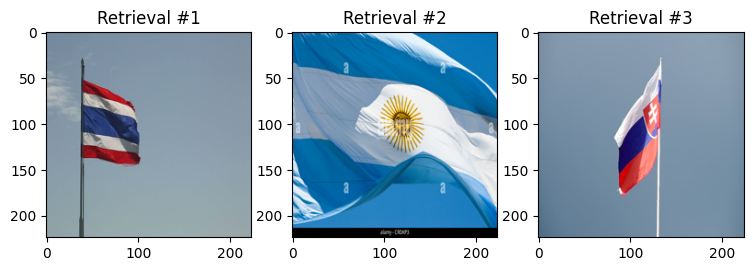

Arithmetic:
cities/bangkok + (flags/china - cities/beijing)
Expected result: flags/thailand
Model generated outputs:


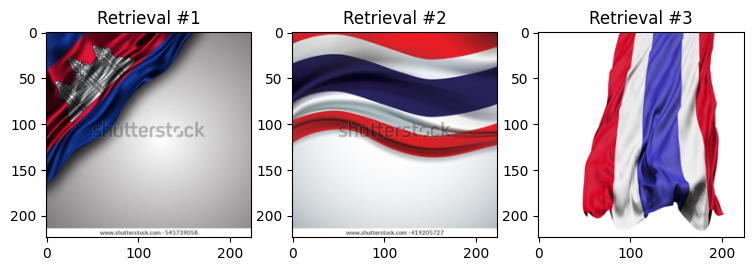

countries -> food
Arithmetic:
food/baguette + (countries/japan - food/sushi)
Expected result: countries/france
Model generated outputs:


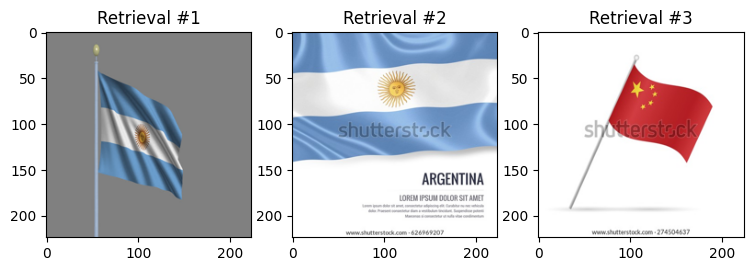

Arithmetic:
food/sushi + (countries/italy - food/pizza)
Expected result: countries/japan
Model generated outputs:


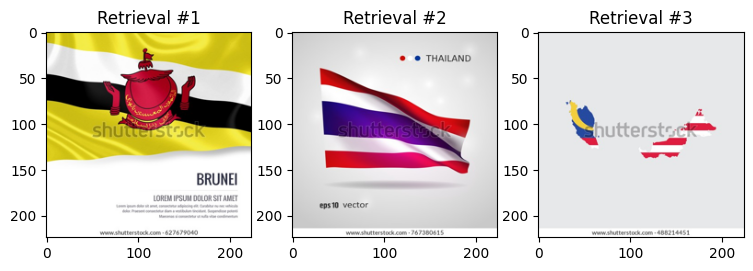

Arithmetic:
food/pizza + (countries/france - food/baguette)
Expected result: countries/italy
Model generated outputs:
 flag with the flag in the center.
countries -> building
Arithmetic:
building/capitol + (countries/china - building/china_wall)
Expected result: countries/usa
Model generated outputs:


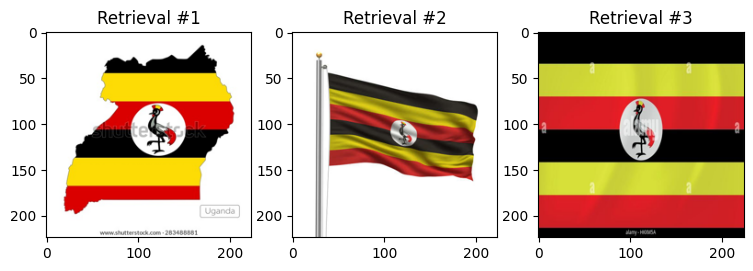

Arithmetic:
building/china_wall + (countries/italy - building/colosseum)
Expected result: countries/china
Model generated outputs:
 flag with the mountains and the ocean.
Arithmetic:
building/colosseum + (countries/france - building/eiffle)
Expected result: countries/italy
Model generated outputs:
 map of the country with the national flag.
Arithmetic:
building/eiffle + (countries/russia - building/kremlin)
Expected result: countries/france
Model generated outputs:


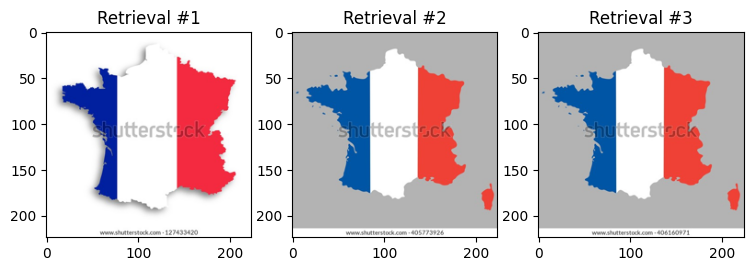

Arithmetic:
building/kremlin + (countries/italy - building/pisa)
Expected result: countries/russia
Model generated outputs:
 flag.
Arithmetic:
building/pisa + (countries/egypt - building/pyramid)
Expected result: countries/italy
Model generated outputs:
 map with the flag in the middle.
Arithmetic:
building/pyramid + (countries/india - building/taj_mahal)
Expected result: countries/egypt
Model generated outputs:
 flag on a map of the world.
Arithmetic:
building/taj_mahal + (countries/usa - building/capitol)
Expected result: countries/india
Model generated outputs:


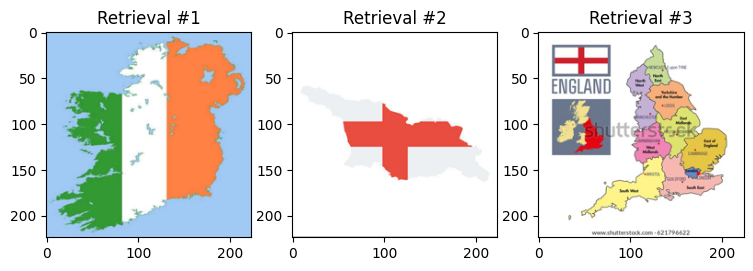

flags -> leaders
Arithmetic:
leaders/angela_merkel + (flags/england - leaders/boris_johnson)
Expected result: flags/germany
Model generated outputs:


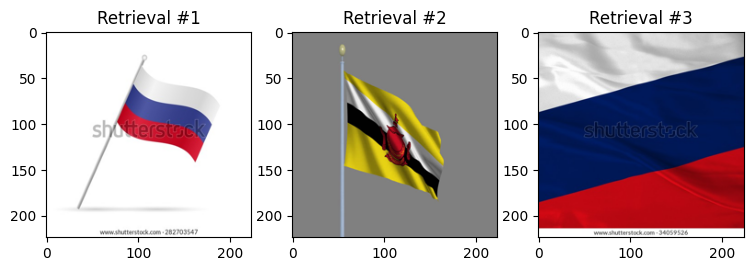

Arithmetic:
leaders/boris_johnson + (flags/england - leaders/david_cameron)
Expected result: flags/england
Model generated outputs:
 flag waving in the wind.
Arithmetic:
leaders/david_cameron + (flags/usa - leaders/hillary)
Expected result: flags/england
Model generated outputs:


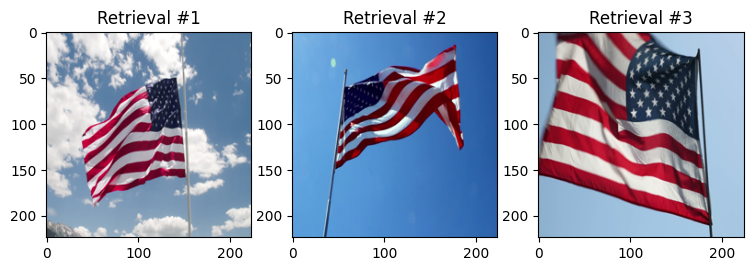

Arithmetic:
leaders/hillary + (flags/canada - leaders/justin_trudeau)
Expected result: flags/usa
Model generated outputs:


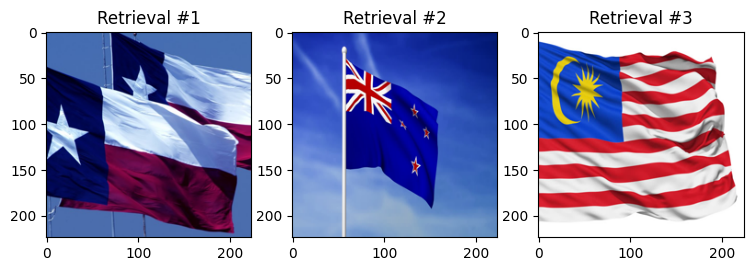

Arithmetic:
leaders/justin_trudeau + (flags/usa - leaders/obama)
Expected result: flags/canada
Model generated outputs:


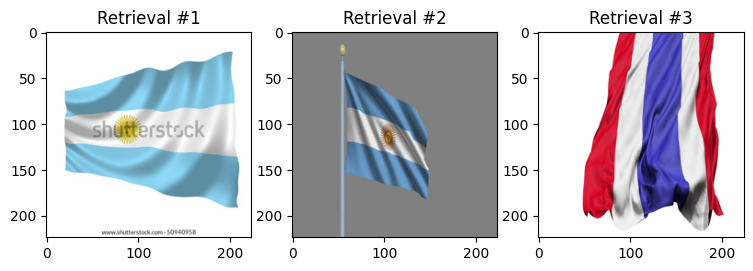

Arithmetic:
leaders/obama + (flags/russia - leaders/putin)
Expected result: flags/usa
Model generated outputs:
 flag on a white background (Photo by Ramiro Ramiro/Getty Images)
Arithmetic:
leaders/putin + (flags/england - leaders/queen_elizabeth)
Expected result: flags/russia
Model generated outputs:
 flag with a flag with a flag.
Arithmetic:
leaders/queen_elizabeth + (flags/usa - leaders/trump)
Expected result: flags/england
Model generated outputs:


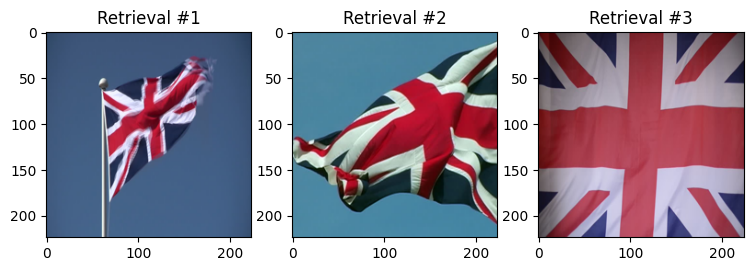

Arithmetic:
leaders/trump + (flags/china - leaders/xi_jinping)
Expected result: flags/usa
Model generated outputs:


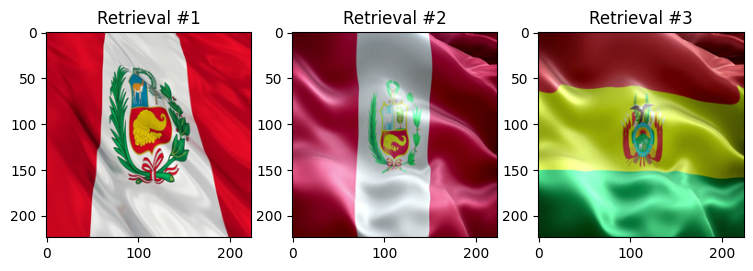

Arithmetic:
leaders/xi_jinping + (flags/germany - leaders/angela_merkel)
Expected result: flags/china
Model generated outputs:


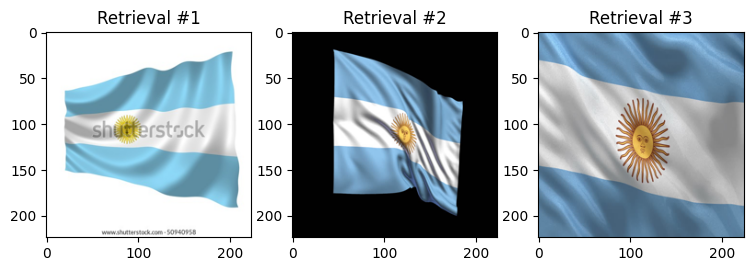

In [33]:
for relation, values in relations.items():
    print(relation)
    print('=' * 120)
    for i in range(0, len(values)):
        tuple1 = values[i]
        
        if i == len(values)-1:
            tuple2 = values[0]
        else:
            tuple2 = values[i+1]
        
        print('='*60)
        print("Arithmetic:")
        print("{} + ({} - {})".format(tuple1[1], tuple2[0], tuple2[1]))
        print("Expected result: {}".format(tuple1[0]))

        inp_image = parser.model.visual_embs[tuple1[1]] + (parser.model.visual_embs[tuple2[0]] - parser.model.visual_embs[tuple2[1]])
        # prompt = [inp_image]
        prompt = [inp_image, "[RET]"]

        print('=' * 30)
        model_outputs = parser.model.generate_for_images_and_texts(prompt, num_words=32, ret_scale_factor=1.5, max_img_per_ret=3)

        print('Model generated outputs:')
        parser.display(model_outputs)
        print("=================================================================================")